# RECOMIENDAME UN LIBRO
(**Base de datos de libros en inglés de goodreads**)
___
___

## 1 Insumos

### 1.1 Carga de librerias, accesos y pre-procesamiento de datos

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.mixture import GaussianMixture 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

In [ ]:
# Acceso
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/My Drive/Colab Notebooks/1_Datasets'
%ls -al

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/1_Datasets
total 15527
-rw------- 1 root root 8934363 Apr 17 19:16 1.1_input_dataset.csv
-rw------- 1 root root 1926620 Apr 24 00:22 1.2_sample_dataset.csv
-rw------- 1 root root 1408773 Apr 24 00:24 1.3_clean_dataset.csv
-rw------- 1 root root 1435591 Apr 24 00:29 1.4_cluster_dataset.csv
-rw------- 1 root root 2193608 Apr 24 02:03 1.5_encoding_dataset.csv


In [ ]:
df = pd.read_csv('1.5_encoding_dataset.csv', index_col=0)

In [ ]:
df.head(3)

,ISBN,Name,Authors,Publisher,Rating,pagesNumber,CountsOfReview,PublishYear,Cluster,NAP
0,0439554896,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,Scholastic,4.42,352,244,2003,2,harri potter chamber secret harri potter 2 jk ...
1,0976540606,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,Nimble Books,3.79,152,1,2005,0,unauthor harri potter book seven news halfbloo...
2,0767910435,Bryson's Dictionary of Troublesome Words: A Wr...,Bill Bryson,Broadway Books,3.88,256,131,2004,1,bryson dictionari troublesom word writer guid ...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13405 entries, 0 to 13404
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ISBN            13405 non-null  object 
 1   Name            13405 non-null  object 
 2   Authors         13405 non-null  object 
 3   Publisher       13405 non-null  object 
 4   Rating          13405 non-null  float64
 5   pagesNumber     13405 non-null  int64  
 6   CountsOfReview  13405 non-null  int64  
 7   PublishYear     13405 non-null  int64  
 8   Cluster         13405 non-null  int64  
 9   NAP             13405 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 1.1+ MB


### 1.2 Semejanza

In [ ]:
vec_df = CountVectorizer()
vec_df = vec_df.fit_transform(df['NAP'])
vec_df.shape

(13405, 16539)

In [ ]:
sem_df = cosine_similarity(vec_df,vec_df)
sem_df.shape

(13405, 13405)

In [ ]:
def orden_semejanza(ISBN):
    ind_sem = pd.Series(df.index, index=df['ISBN']).drop_duplicates()
    ind_sem = ind_sem[ISBN]

    sem = list(enumerate(sem_df[ind_sem]))
    sem = sorted(sem, key=lambda orden: orden[1], reverse=True)
   
    mask = [i[0] for i in sem]
    return df.iloc[mask].drop(columns = ['NAP'])

### 1.3 Instantanea

In [ ]:
ISBN = '0804741719'

In [ ]:
consulta = orden_semejanza(ISBN)
consulta.head(11)

,ISBN,Name,Authors,Publisher,Rating,pagesNumber,CountsOfReview,PublishYear,Cluster
1825,0804741719,"Human, All Too Human (Complete Works 3)",Friedrich Nietzsche,"Stanford University Press (Stanford, CA)",4.21,396,4,2000,1
2747,0804728844,Unpublished Writings from the Period of Unfash...,Friedrich Nietzsche,Stanford University Press,4.06,536,0,2000,3
11707,0804739196,Belief,Gianni Vattimo,Stanford University Press,3.48,104,9,1999,0
8815,0674016386,On Human Nature,Edward O. Wilson,Harvard University Press,4.08,288,124,2004,1
10982,052169163X,On the Genealogy of Morality,Friedrich Nietzsche,Cambridge University Press,4.12,195,35,2006,0
12245,0192831380,Twilight of the Idols,Friedrich Nietzsche,Oxford University Press,3.94,176,5,1998,0
10943,0199266344,An Enquiry Concerning Human Understanding (Works),David Hume,"Clarendon/Oxford University Press, USA",3.92,344,2,2006,1
13174,0691020744,Introduction to the Human Sciences (Selected W...,Wilhelm Dilthey,Princeton University Press,3.80,544,2,1991,3
435,0521639875,The Birth of Tragedy and Other Writings,Friedrich Nietzsche,Cambridge University Press,4.04,204,24,1999,0
7082,0674749456,Realism with a Human Face,Hilary Putnam,Harvard University Press,3.97,347,1,1992,1


In [ ]:
consulta = consulta.reset_index()
consulta = consulta.drop(columns= ['index','Cluster'])

In [ ]:
consulta = consulta.reset_index()
consulta.head(3)

,index,ISBN,Name,Authors,Publisher,Rating,pagesNumber,CountsOfReview,PublishYear
0,0,0804741719,"Human, All Too Human (Complete Works 3)",Friedrich Nietzsche,"Stanford University Press (Stanford, CA)",4.21,396,4,2000
1,1,0804728844,Unpublished Writings from the Period of Unfash...,Friedrich Nietzsche,Stanford University Press,4.06,536,0,2000
2,2,0804739196,Belief,Gianni Vattimo,Stanford University Press,3.48,104,9,1999


___
___

## 2 Clustering a posteriori
___

### 2.1 Normalización de variables numericas

In [ ]:
num_df = consulta[list(consulta.columns[consulta.dtypes != object])]
num_df.head(3)

,index,Rating,pagesNumber,CountsOfReview,PublishYear
0,0,4.21,396,4,2000
1,1,4.06,536,0,2000
2,2,3.48,104,9,1999


In [ ]:
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(num_df)
scaled_df

array([[-1.7319216 ,  1.03686813,  0.7276422 , -0.72148682, -0.16477439],
       [-1.73166318,  0.46572688,  1.68116392, -0.76043421, -0.16477439],
       [-1.73140477, -1.74268595, -1.26113169, -0.6728026 , -0.34610602],
       ...,
       [ 1.73140477, -0.29579478,  0.53693785,  2.04377734, -0.16477439],
       [ 1.73166318, -1.74268595, -1.96946211, -0.76043421,  0.19788888],
       [ 1.7319216 , -0.44809912, -0.11690561, -0.71174998,  0.01655725]])

In [ ]:
normalized_df = normalize(scaled_df) 
normalized_df

array([[-0.76304214,  0.45681864,  0.32058129, -0.31786938, -0.07259555],
       [-0.67164746,  0.18063806,  0.65206068, -0.29494402, -0.06390983],
       [-0.60472044, -0.60866057, -0.44047014, -0.23498692, -0.12088299],
       ...,
       [ 0.62896848, -0.10745355,  0.19505375,  0.74244426, -0.05985769],
       [ 0.53359513, -0.53699169, -0.60687055, -0.23432039,  0.06097753],
       [ 0.89785401, -0.23230127, -0.06060562, -0.36898181,  0.00858353]])

In [ ]:
# ['Ordering', 'Rating', 'pagesNumber', 'CountsOfReview', 'PublishYear']
nor_df = pd.DataFrame(normalized_df)
nor_df

,0,1,2,3,4
0,-0.763042,0.456819,0.320581,-0.317869,-0.072596
1,-0.671647,0.180638,0.652061,-0.294944,-0.063910
2,-0.604720,-0.608661,-0.440470,-0.234987,-0.120883
3,-0.887530,0.277812,-0.004066,0.229136,0.287386
4,-0.780534,0.313038,-0.289210,-0.189236,0.416319
...,...,...,...,...,...
13400,0.847470,-0.051613,0.156183,-0.224534,0.452021
13401,0.770060,-0.046891,0.432742,-0.329599,0.330010
13402,0.628968,-0.107454,0.195054,0.742444,-0.059858
13403,0.533595,-0.536992,-0.606871,-0.234320,0.060978


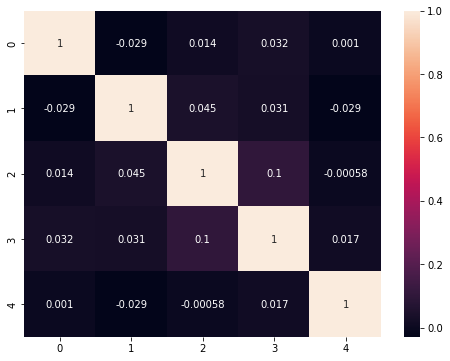

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(nor_df.corr(), annot=True)
plt.show()

___

### 2.2 Número de clusters

In [ ]:
# ['Order', 'Rating']
X_principal = nor_df[[0, 1]]
X_principal

,0,1
0,-0.763042,0.456819
1,-0.671647,0.180638
2,-0.604720,-0.608661
3,-0.887530,0.277812
4,-0.780534,0.313038
...,...,...
13400,0.847470,-0.051613
13401,0.770060,-0.046891
13402,0.628968,-0.107454
13403,0.533595,-0.536992


In [ ]:
def ordena(arr:list, X:int)->list:
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [ ]:
# Promedio sobre 20 instancias 

n_clusters=np.arange(2, 11)
sils=[]
err_sils=[]
vueltas=20

for n in n_clusters:
    tmp_sil=[]
    for _ in range(vueltas):
        gmm=GaussianMixture(n, n_init=2).fit(X_principal) 
        labels=gmm.predict(X_principal)
        sil=metrics.silhouette_score(X_principal, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(ordena(np.array(tmp_sil), int(vueltas/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    err_sils.append(err)

Text(0, 0.5, 'Puntaje')

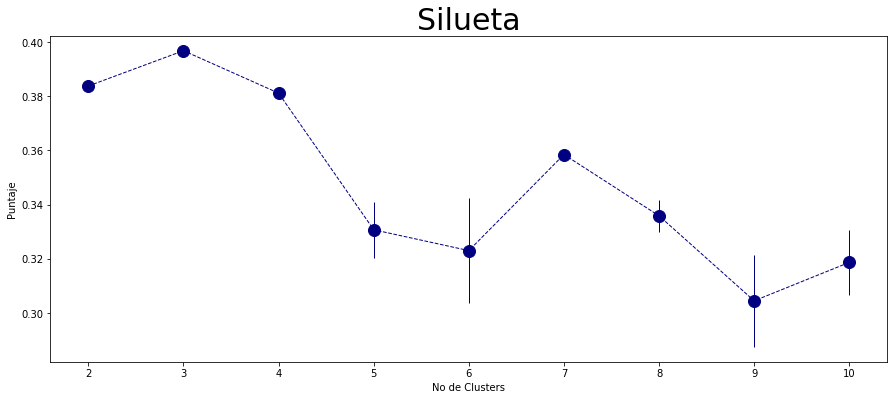

In [ ]:
plt.figure(1, figsize = (15 ,6))
plt.errorbar(n_clusters, sils, yerr=err_sils,label='BIC', color='navy', marker='o', linestyle='dashed', linewidth=1, markersize=12)
plt.title('Silueta', fontsize=20,  size = 30)
plt.xticks(n_clusters)
plt.xlabel('No de Clusters')
plt.ylabel('Puntaje')

___

### 2.3 Selecicón del modelo

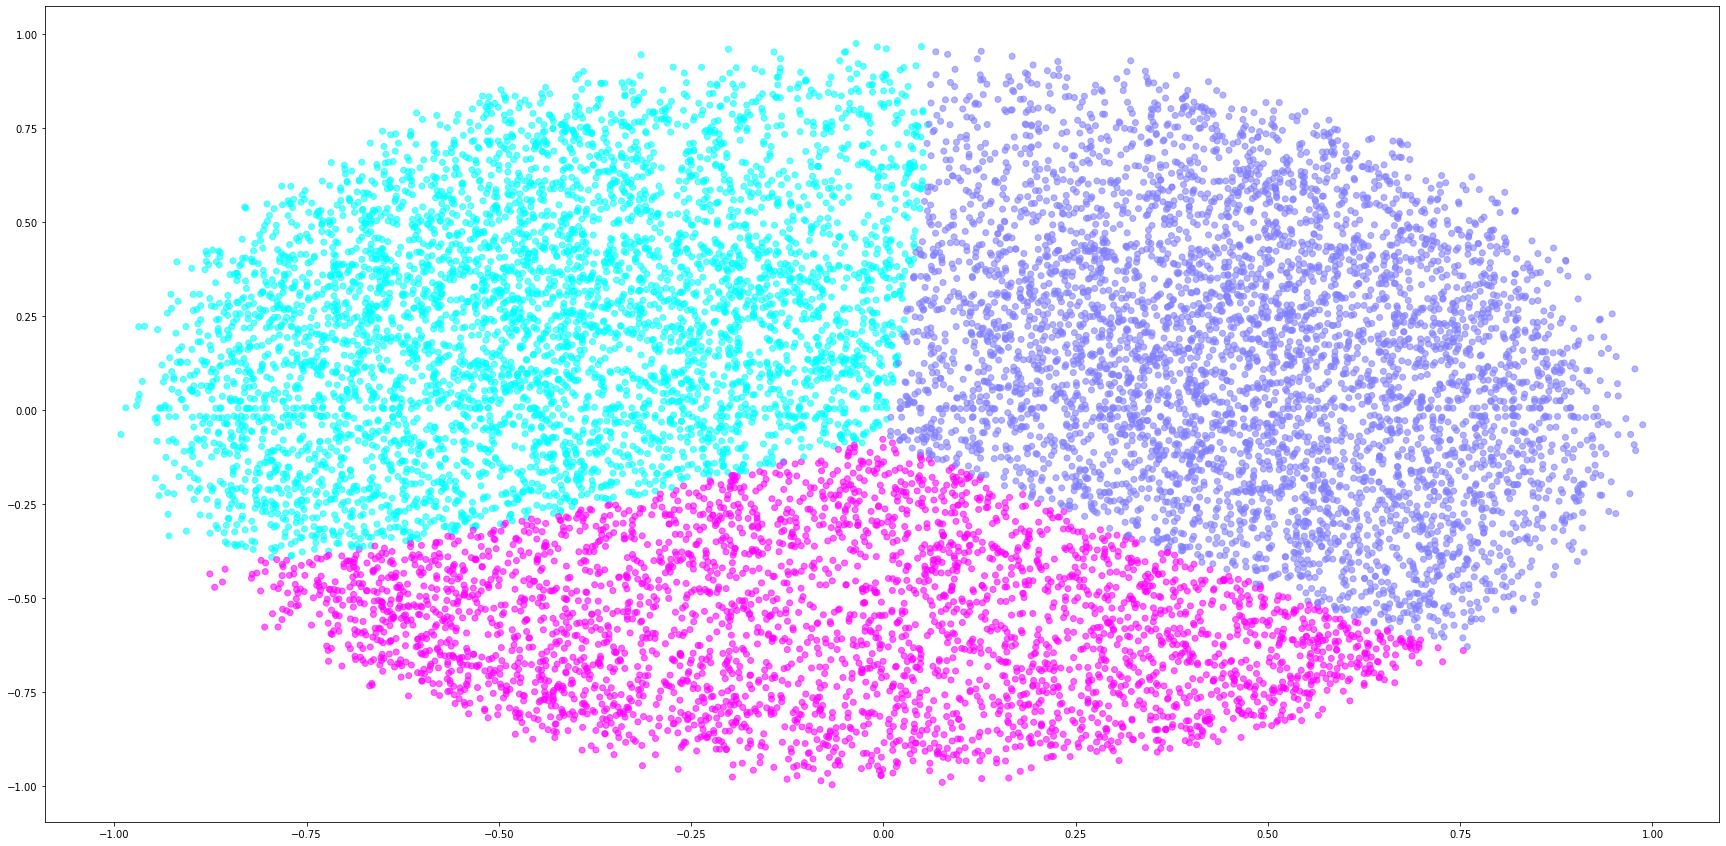

In [ ]:
plt.figure(1, figsize = (30 , 15))
plt.scatter(nor_df[0], nor_df[1], c = GaussianMixture(n_components = 3).fit_predict(nor_df[[0,1]]),cmap=plt.cm.cool, alpha = 0.6) 
plt.show() 

In [ ]:
consulta['Cluster'] = GaussianMixture(n_components = 3).fit_predict(nor_df[[0,1]])

In [ ]:
consulta.head(11)

,index,ISBN,Name,Authors,Publisher,Rating,pagesNumber,CountsOfReview,PublishYear,Cluster
0,0,0804741719,"Human, All Too Human (Complete Works 3)",Friedrich Nietzsche,"Stanford University Press (Stanford, CA)",4.21,396,4,2000,0
1,1,0804728844,Unpublished Writings from the Period of Unfash...,Friedrich Nietzsche,Stanford University Press,4.06,536,0,2000,0
2,2,0804739196,Belief,Gianni Vattimo,Stanford University Press,3.48,104,9,1999,1
3,3,0674016386,On Human Nature,Edward O. Wilson,Harvard University Press,4.08,288,124,2004,0
4,4,052169163X,On the Genealogy of Morality,Friedrich Nietzsche,Cambridge University Press,4.12,195,35,2006,0
5,5,0192831380,Twilight of the Idols,Friedrich Nietzsche,Oxford University Press,3.94,176,5,1998,0
6,6,0199266344,An Enquiry Concerning Human Understanding (Works),David Hume,"Clarendon/Oxford University Press, USA",3.92,344,2,2006,0
7,7,0691020744,Introduction to the Human Sciences (Selected W...,Wilhelm Dilthey,Princeton University Press,3.80,544,2,1991,0
8,8,0521639875,The Birth of Tragedy and Other Writings,Friedrich Nietzsche,Cambridge University Press,4.04,204,24,1999,0
9,9,0674749456,Realism with a Human Face,Hilary Putnam,Harvard University Press,3.97,347,1,1992,0


In [ ]:
consulta[consulta['Cluster']==0].head(11)

,index,ISBN,Name,Authors,Publisher,Rating,pagesNumber,CountsOfReview,PublishYear,Cluster
0,0,0804741719,"Human, All Too Human (Complete Works 3)",Friedrich Nietzsche,"Stanford University Press (Stanford, CA)",4.21,396,4,2000,0
1,1,0804728844,Unpublished Writings from the Period of Unfash...,Friedrich Nietzsche,Stanford University Press,4.06,536,0,2000,0
3,3,0674016386,On Human Nature,Edward O. Wilson,Harvard University Press,4.08,288,124,2004,0
4,4,052169163X,On the Genealogy of Morality,Friedrich Nietzsche,Cambridge University Press,4.12,195,35,2006,0
5,5,0192831380,Twilight of the Idols,Friedrich Nietzsche,Oxford University Press,3.94,176,5,1998,0
6,6,0199266344,An Enquiry Concerning Human Understanding (Works),David Hume,"Clarendon/Oxford University Press, USA",3.92,344,2,2006,0
7,7,0691020744,Introduction to the Human Sciences (Selected W...,Wilhelm Dilthey,Princeton University Press,3.80,544,2,1991,0
8,8,0521639875,The Birth of Tragedy and Other Writings,Friedrich Nietzsche,Cambridge University Press,4.04,204,24,1999,0
9,9,0674749456,Realism with a Human Face,Hilary Putnam,Harvard University Press,3.97,347,1,1992,0
10,10,019283617X,On the Genealogy of Morals,Friedrich Nietzsche,"Oxford University Press, USA",4.12,208,297,1999,0


___
___